# MovieLens 100K Dataset
MovieLens 100K movie ratings. Stable benchmark dataset. 100,000 ratings from 1000 users on 1700 movies. Released 4/1998.
#### Link
https://grouplens.org/datasets/movielens/100k/

#### References
* http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/
* https://github.com/obust/Pandas-Tutorial
* https://medium.com/@iliazaitsev/how-to-implement-a-recommendation-system-with-deep-learning-and-pytorch-2d40476590f9
* https://github.com/LaceyChen17/neural-collaborative-filtering
* https://towardsdatascience.com/recommender-systems-using-deep-learning-in-pytorch-from-scratch-f661b8f391d7

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

#### Import User data

In [2]:
# pass in column names for each CSV
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/ml-100k/u.user', sep='|', names=u_cols, encoding='latin-1')

r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('data/ml-100k/u.data', sep='\t', names=r_cols, encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv('data/ml-100k/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')

#### Merge Data

In [3]:
# create one merged DataFrame
movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
# Drop collumn
lens = lens.drop(columns=['video_release_date'])
# Remove lines with Nan
lens = lens.dropna()
#lens.drop_duplicates(subset ="movie_id", keep=False,inplace=True) 

In [4]:
lens

,movie_id,title,release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
...,...,...,...,...,...,...,...,...,...,...,...
99995,748,"Saint, The (1997)",14-Mar-1997,http://us.imdb.com/M/title-exact?Saint%2C%20Th...,729,4,893286638,19,M,student,56567
99996,751,Tomorrow Never Dies (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-12...,729,3,893286338,19,M,student,56567
99997,879,"Peacemaker, The (1997)",01-Jan-1997,http://us.imdb.com/M/title-exact?Peacemaker%2C...,729,3,893286299,19,M,student,56567
99998,894,Home Alone 3 (1997),01-Jan-1997,http://us.imdb.com/M/title-exact?imdb-title-11...,729,1,893286511,19,M,student,56567


In [5]:
most_rated = lens.groupby('title').size().sort_values(ascending=False)[:25]

In [6]:
most_rated.head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
dtype: int64

In [7]:
movie_stats = lens.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
title                                     
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

#### Users Distribution

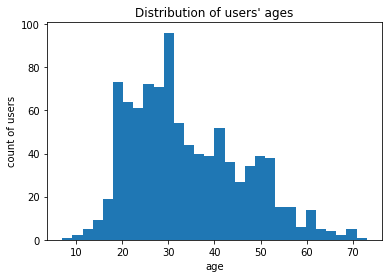

In [8]:
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

#### Select Collunns for Training

In [9]:
dataset = lens[['user_id', 'movie_id', 'rating']]
dataset_numpy = dataset.to_numpy()
print('dataset_numpy.shape:', dataset_numpy.shape)
dataset

dataset_numpy.shape: (99987, 3)


,user_id,movie_id,rating
0,308,1,4
1,308,4,5
2,308,5,4
3,308,7,4
4,308,8,5
...,...,...,...
99995,729,748,4
99996,729,751,3
99997,729,879,3
99998,729,894,1


#### Split Train/Validation

In [10]:
xTrain, xTest, yTrain, yTest = train_test_split(dataset_numpy[:,0:2], dataset_numpy[:,2], test_size = 0.2, random_state = 0)
# Concatenate X and Y
train = np.hstack((xTrain, np.expand_dims(yTrain, axis=1)))
test = np.hstack((xTest, np.expand_dims(yTest, axis=1)))
np.save('train', train)
np.save('val', test)